In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'Combined_Crash_Reports.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

C:\Users\bhars\AppData\Local\Temp\ipykernel_24104\2271608487.py:6: DtypeWarning: Columns (3,5,6,7,9,10,18,19,20,21,22,23,24,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Agency Name       ACRS Report Type  Crash Date/Time Hit/Run  \
0   Montgomery County Police           Injury Crash    3/4/2019 8:41      No   
1   Montgomery County Police  Property Damage Crash   6/4/2016 19:14     Yes   
2                 MONTGOMERY  Property Damage Crash  8/18/2015 23:00      No   
3   Montgomery County Police           Injury Crash   8/24/2023 7:46      No   
4  Rockville Police Departme  Property Damage Crash  8/12/2023 16:28     Yes   

         Route Type Lane Direction Number of Lanes Direction  Distance  \
0  Maryland (State)           West               2      East     200.0   
1            County           East               1      East     500.0   
2            County          South               2     South      30.0   
3  Maryland (State)           West               4      West      50.0   
4               NaN          South               3     South      40.0   

  Distance Unit  ... Related Non-Motorist Non-Motorist Substance Abuse  \
0          FEET  ...                  NaN                          NaN   
1          FEET  ...                  NaN                          NaN   
2          FEET  ...                  NaN                          NaN   
3          FEET  ...                  NaN                          NaN   
4          FEET  ...                  NaN                          NaN   

  Person ID Pedestrian Type Pedestrian Movement Pedestrian Actions  \
0       NaN             NaN                 NaN                NaN   
1       NaN             NaN                 NaN                NaN   
2       NaN             NaN                 NaN                NaN   
3       NaN             NaN                 NaN                NaN   
4       NaN             NaN                 NaN                NaN   

  Pedestrian Location Injury Severity Safety Equipment Location  
0                 NaN             NaN              NaN      NaN  
1                 NaN             NaN              NaN      NaN  
2                 NaN             NaN              NaN      NaN  
3                 NaN             NaN              NaN      NaN  
4                 NaN             NaN              NaN      NaN  

[5 rows x 43 columns]

In [3]:
# Calculate the number and percentage of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame for better visibility
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Display columns with missing values
missing_data[missing_data['Missing Values'] > 0]

Missing Values  Missing Percentage
Hit/Run                                 8497            7.365957
Route Type                             15841           13.732391
Lane Direction                         20159           17.475619
Number of Lanes                        18755           16.258506
Direction                              20142           17.460882
Distance                               18279           15.845867
Distance Unit                          18743           16.248104
Road Grade                             20770           18.005288
At Fault                                 287            0.248797
Collision Type                           682            0.591218
Weather                                 8406            7.287070
Surface Condition                      17630           15.283256
Light                                    861            0.746392
Traffic Control                        18742           16.247237
Driver Substance Abuse                 16779           14.545533
First Harmful Event                     7066            6.125439
Second Harmful Event                   86955           75.380348
Junction                               34235           29.677951
Intersection Type                      63726           55.243379
Road Alignment                         20552           17.816306
Road Condition                         25456           22.067531
Road Division                          21332           18.492480
Report Number                         108939           94.438039
Local Case Number                     108939           94.438039
Road Name                             110407           95.710632
Cross-Street Name                     110644           95.916085
Off-Road Description                  113971           98.800225
Municipality                          114731           99.459061
Related Non-Motorist                  108939           94.438039
Non-Motorist Substance Abuse          110142           95.480907
Person ID                             108939           94.438039
Pedestrian Type                       108939           94.438039
Pedestrian Movement                   109117           94.592345
Pedestrian Actions                    109233           94.692905
Pedestrian Location                   109092           94.570673
Injury Severity                       108939           94.438039
Safety Equipment                      111498           96.656408
Location                              108939           94.438039

In [4]:
# Check the data types and unique values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115355 entries, 0 to 115354
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Agency Name                   115355 non-null  object 
 1   ACRS Report Type              115355 non-null  object 
 2   Crash Date/Time               115355 non-null  object 
 3   Hit/Run                       106858 non-null  object 
 4   Route Type                    99514 non-null   object 
 5   Lane Direction                95196 non-null   object 
 6   Number of Lanes               96600 non-null   object 
 7   Direction                     95213 non-null   object 
 8   Distance                      97076 non-null   float64
 9   Distance Unit                 96612 non-null   object 
 10  Road Grade                    94585 non-null   object 
 11  At Fault                      115068 non-null  object 
 12  Collision Type                114673 non-nul

In [5]:
df.describe(include='all').T

count  unique  \
Agency Name                     115355      10   
ACRS Report Type                115355       3   
Crash Date/Time                 115355  112351   
Hit/Run                         106858       2   
Route Type                       99514      19   
Lane Direction                   95196      35   
Number of Lanes                96600.0    96.0   
Direction                        95213       5   
Distance                       97076.0     NaN   
Distance Unit                    96612       3   
Road Grade                       94585      22   
At Fault                        115068       7   
Collision Type                  114673      28   
Weather                         106949      22   
Surface Condition                97725      21   
Light                           114494      16   
Traffic Control                  96613      69   
Driver Substance Abuse           98576     104   
First Harmful Event             108289      65   
Second Harmful Event             28400      64   
Junction                         81120      21   
Intersection Type                51629      11   
Road Alignment                   94803      12   
Road Condition                   89899      21   
Road Division                    94023      32   
Latitude                      115355.0     NaN   
Longitude                     115355.0     NaN   
Report Number                     6416    6107   
Local Case Number               6416.0     NaN   
Road Name                         4948    1123   
Cross-Street Name                 4711    1659   
Off-Road Description              1384    1289   
Municipality                       624      13   
Related Non-Motorist              6416      28   
Non-Motorist Substance Abuse      5213      18   
Person ID                         6416    6413   
Pedestrian Type                   6416      19   
Pedestrian Movement               6238      19   
Pedestrian Actions                6122      71   
Pedestrian Location               6263      35   
Injury Severity                   6416      10   
Safety Equipment                  3857      23   
Location                          6416    6099   

                                                                    top  \
Agency Name                                    Montgomery County Police   
ACRS Report Type                                  Property Damage Crash   
Crash Date/Time                                         5/22/2015 21:55   
Hit/Run                                                              No   
Route Type                                             Maryland (State)   
Lane Direction                                                    North   
Number of Lanes                                                     2.0   
Direction                                                         North   
Distance                                                            NaN   
Distance Unit                                                      FEET   
Road Grade                                                        LEVEL   
At Fault                                                         DRIVER   
Collision Type                                        SAME DIR REAR END   
Weather                                                           CLEAR   
Surface Condition                                                   DRY   
Light                                                          DAYLIGHT   
Traffic Control                                             NO CONTROLS   
Driver Substance Abuse                                    NONE DETECTED   
First Harmful Event                                       OTHER VEHICLE   
Second Harmful Event                                      OTHER VEHICLE   
Junction                                                   INTERSECTION   
Intersection Type                                 FOUR-WAY INTERSECTION   
Road Alignment                                                 STRAIGHT   
Road Condition                  

# Varience/Data Distribution of the dataset

Data variance of each column:

Distance             1.868645e+04
Latitude             5.270364e-03
Longitude            9.793334e-03
Local Case Number    9.268443e+15
dtype: float64


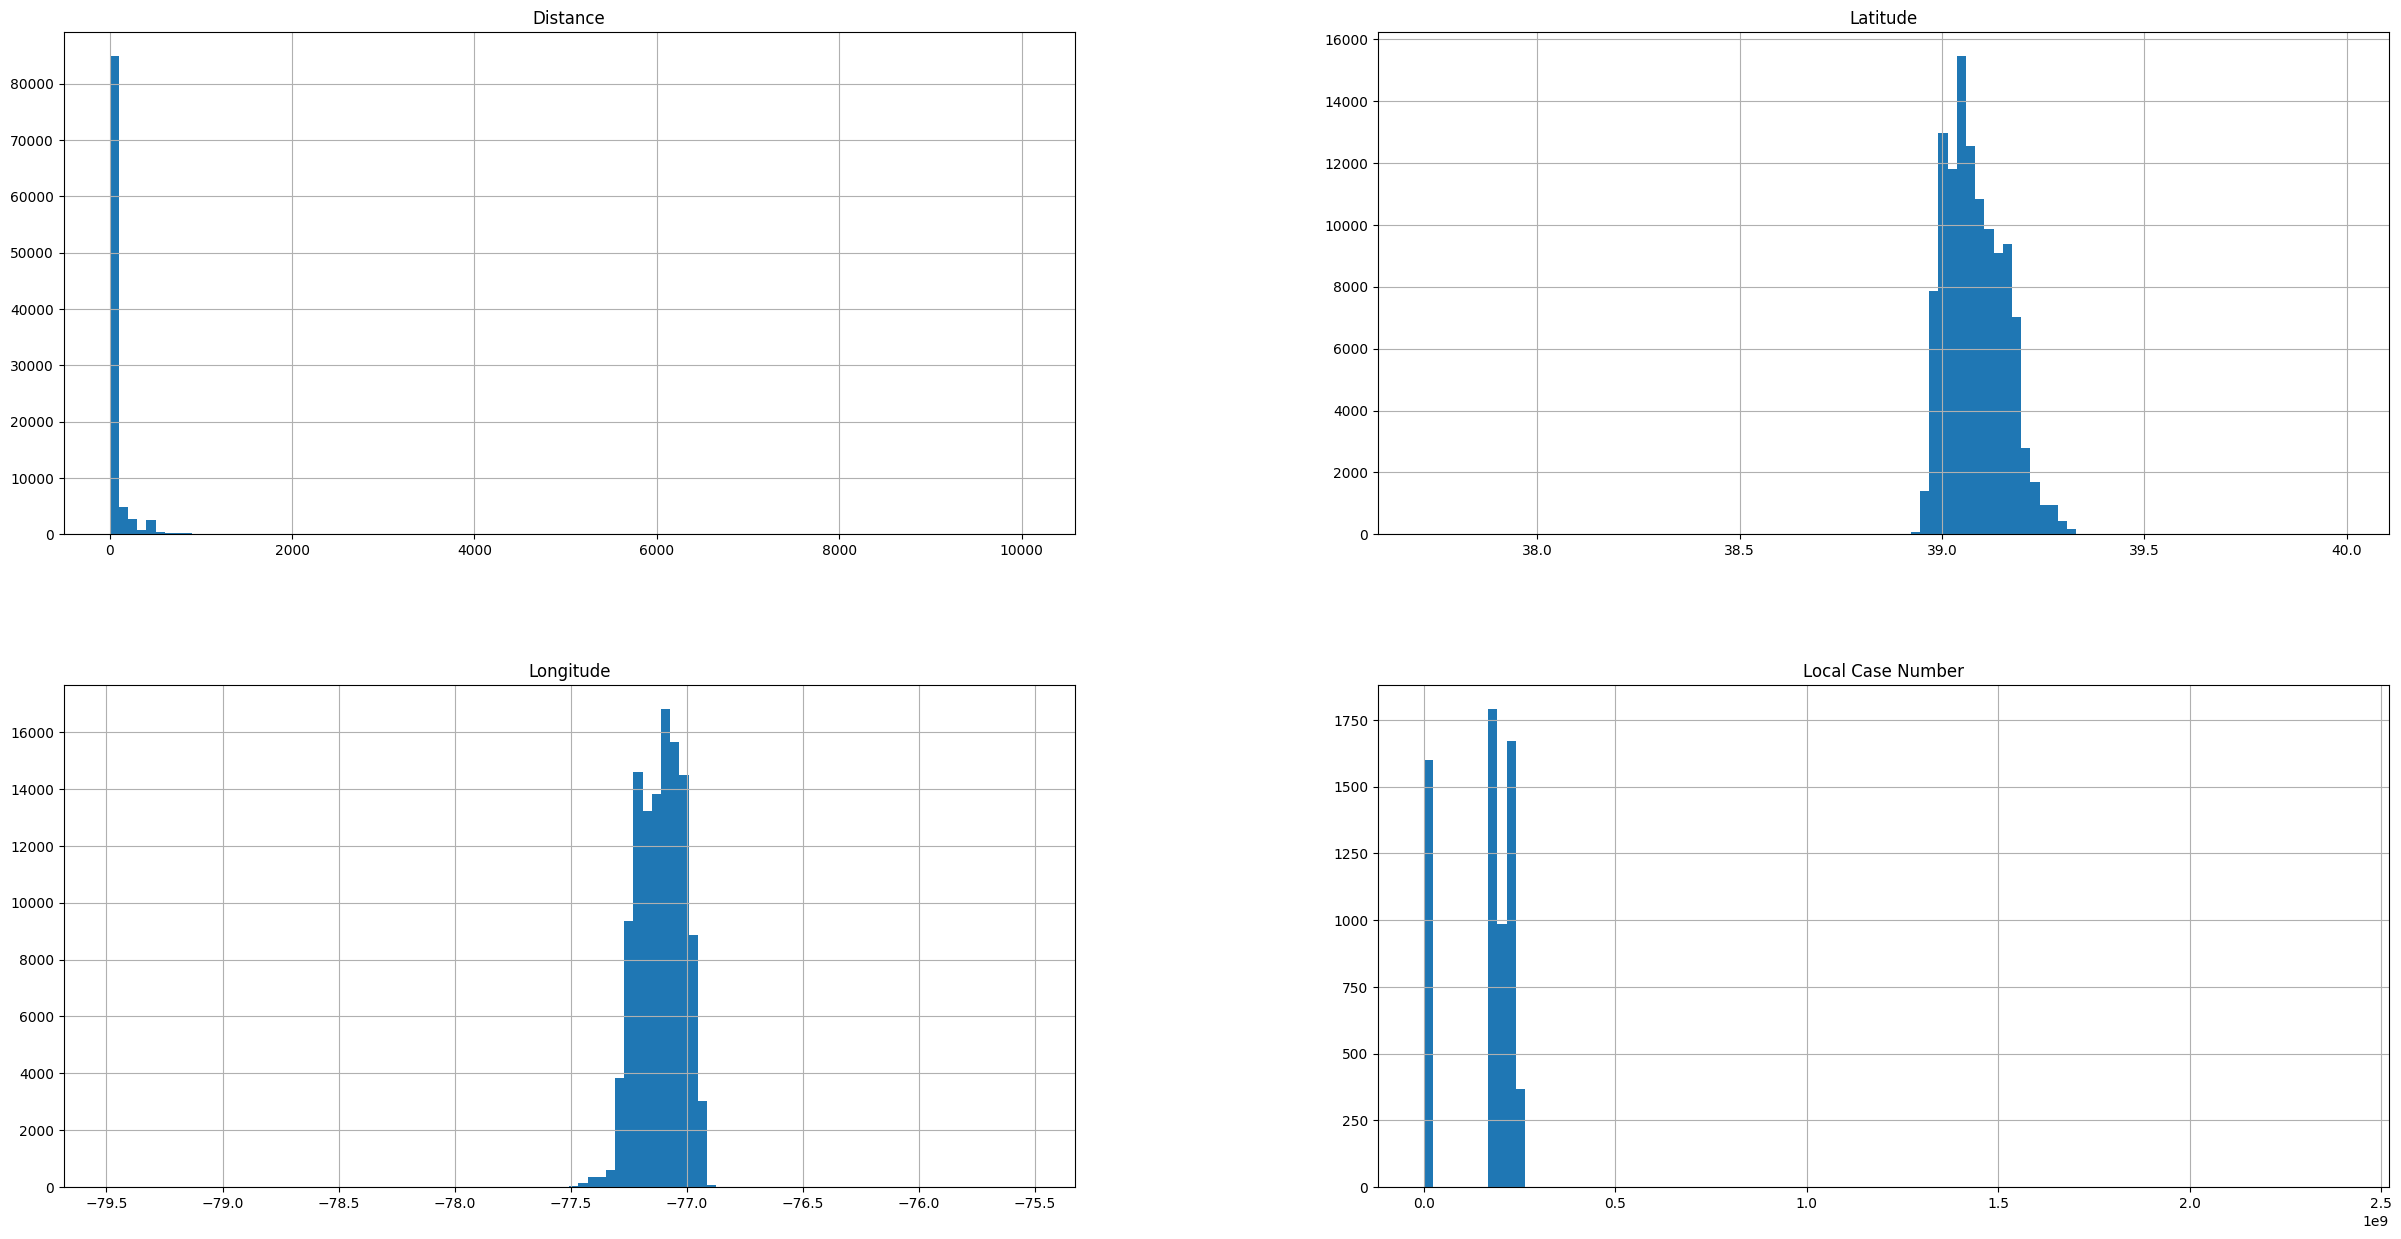

In [7]:
import matplotlib.pyplot as plt
print("Data variance of each column:\n")
temp = df.select_dtypes(include=['number'])
print(temp.var())

temp.hist(figsize=(30, 15), bins=100)
plt.show()

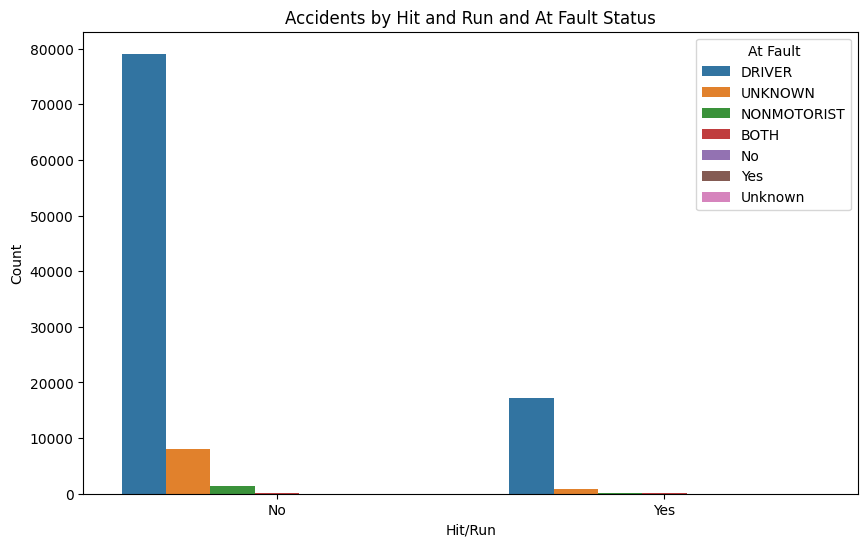

----------------------------------------------



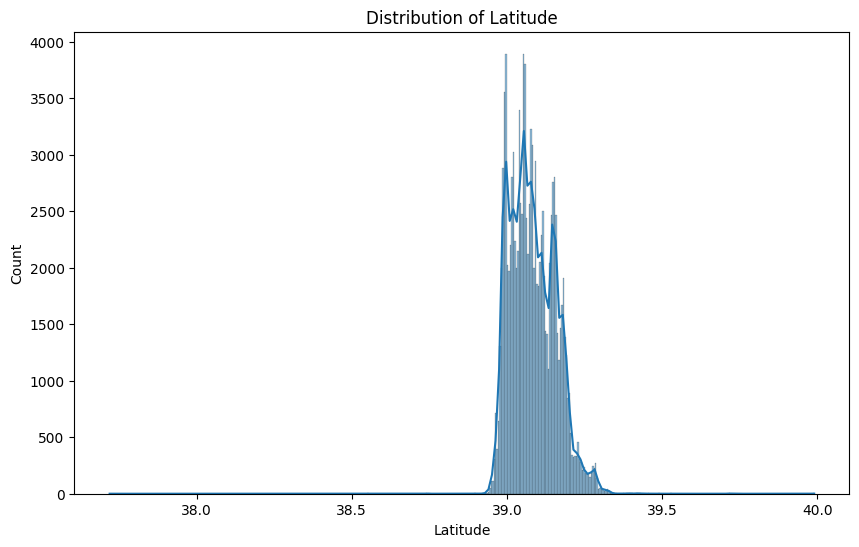

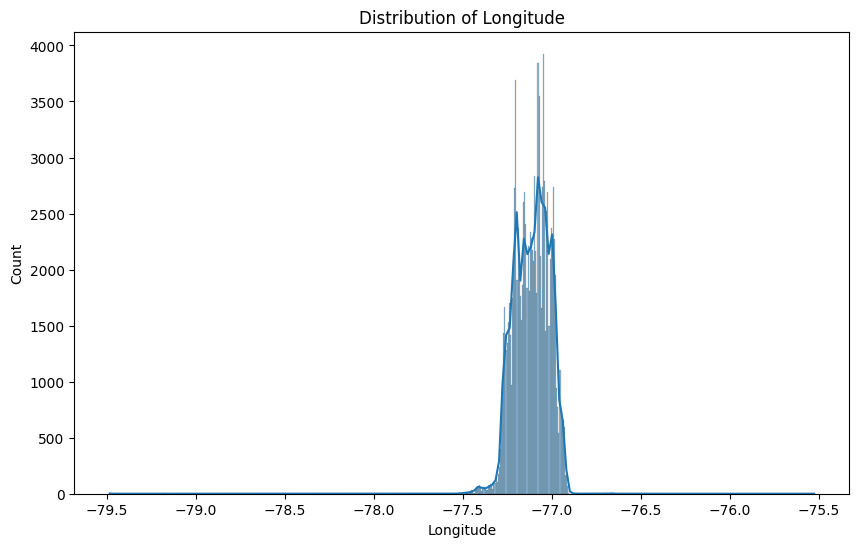

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hit/Run', hue='At Fault')
plt.title('Accidents by Hit and Run and At Fault Status')
plt.xlabel('Hit/Run')
plt.ylabel('Count')
plt.show()

print("----------------------------------------------\n")
numeric_columns = ['Latitude', 'Longitude']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

C:\Users\bhars\AppData\Local\Temp\ipykernel_24104\1999875437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [10]:
# Fill missing values for numerical columns with their median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [11]:
# Verify no missing values remain
df.isnull().sum()

Agency Name                     0
ACRS Report Type                0
Crash Date/Time                 0
Hit/Run                         0
Route Type                      0
Lane Direction                  0
Number of Lanes                 0
Direction                       0
Distance                        0
Distance Unit                   0
Road Grade                      0
At Fault                        0
Collision Type                  0
Weather                         0
Surface Condition               0
Light                           0
Traffic Control                 0
Driver Substance Abuse          0
First Harmful Event             0
Second Harmful Event            0
Junction                        0
Intersection Type               0
Road Alignment                  0
Road Condition                  0
Road Division                   0
Latitude                        0
Longitude                       0
Report Number                   0
Local Case Number               0
Road Name     

In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Standardize text columns by converting to uppercase
for col in categorical_cols:
    df[col] = df[col].str.upper()

In [14]:
# Identify potential outliers in numerical columns using IQR
numerical_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    numerical_summary[col] = outliers

# Display columns with potential outliers
numerical_summary

{'Distance': 18731,
 'Latitude': 222,
 'Longitude': 327,
 'Local Case Number': 6416}

In [15]:
# Convert 'Number of Lanes' to numeric, forcing errors to NaN
df['Number of Lanes'] = pd.to_numeric(df['Number of Lanes'], errors='coerce')

# Drop or fill NaN if necessary
df['Number of Lanes'].fillna(df['Number of Lanes'].median(), inplace=True)

# Cap outliers using IQR
for col in ['Number of Lanes', 'Distance', 'Latitude', 'Longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify results
print(df[['Number of Lanes', 'Distance', 'Latitude', 'Longitude']].describe())


       Number of Lanes       Distance       Latitude      Longitude
count         115351.0  115351.000000  115351.000000  115351.000000
mean               2.0      19.946207      39.083629     -77.113890
std                0.0      30.594151       0.071550       0.095453
min                2.0       0.000000      38.852173     -77.417942
25%                2.0       0.000000      39.025225     -77.191546
50%                2.0       0.200000      39.075643     -77.107036
75%                2.0      32.095000      39.140593     -77.040615
max                2.0      80.237500      39.313645     -76.814219


C:\Users\bhars\AppData\Local\Temp\ipykernel_24104\3162559570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Lanes'].fillna(df['Number of Lanes'].median(), inplace=True)


In [16]:
# Convert 'Crash Date/Time' to datetime format
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for any invalid date/time entries
invalid_dates = df['crash_date/time'].isnull().sum()

# Display the result
print(f"Invalid date/time entries: {invalid_dates}")

# Final check of the cleaned dataset
df.info()


Invalid date/time entries: 6416
<class 'pandas.core.frame.DataFrame'>
Index: 115351 entries, 0 to 115354
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   agency_name                   115351 non-null  object        
 1   acrs_report_type              115351 non-null  object        
 2   crash_date/time               108935 non-null  datetime64[ns]
 3   hit/run                       115351 non-null  object        
 4   route_type                    115351 non-null  object        
 5   lane_direction                115351 non-null  object        
 6   number_of_lanes               115351 non-null  float64       
 7   direction                     115351 non-null  object        
 8   distance                      115351 non-null  float64       
 9   distance_unit                 115351 non-null  object        
 10  road_grade                    115351 non-null  object

In [17]:
# Convert distance to miles and combine into one column
def convert_to_miles(row):
    if row['distance_unit'] == 'FEET':
        return row['distance'] / 5280
    elif row['distance_unit'] == 'MILE':
        return row['distance']
    else:
        return None

In [18]:
# Apply the conversion
df['distance_miles'] = df.apply(convert_to_miles, axis=1)

# Drop the original columns
df.drop(['distance', 'distance_unit'], axis=1, inplace=True)

# Check the result
df[['distance_miles']].head()

distance_miles
0        0.015196
1        0.015196
2        0.005682
3        0.009470
4        0.007576

In [19]:
from sklearn.preprocessing import StandardScaler
import re

# Standardizing Numerical Features
def standardize_numerical_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Numerical columns standardized.")
    return df

# Custom Rule-Based Cleaning (example: replace 'UNK' or similar with 'UNKNOWN')
def custom_cleaning_rules(df):
    # Custom rule for 'weather' column - replace any "UNK" or "UNKNOWN" with "CLEAR"
    if 'weather' in df.columns:
        df['weather'] = df['weather'].replace({'UNK': 'CLEAR', 'UNKNOWN': 'CLEAR'})

    # Custom rule for 'collision_type' - ensure only known categories remain
    known_collision_types = {'SAME DIR REAR END', 'ANGLE', 'HEAD ON', 'SIDESWIPE', 'FIXED OBJECT'}
    if 'collision_type' in df.columns:
        df['collision_type'] = df['collision_type'].apply(lambda x: x if x in known_collision_types else 'OTHER')

    print("Custom rule-based cleaning applied.")
    return df

# String Cleaning (remove special characters, extra spaces, standardize case)
def clean_text_columns(df):
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        df[col] = df[col].str.upper()                                      # Convert to uppercase
        df[col] = df[col].str.strip()                                      # Remove leading/trailing spaces
        df[col] = df[col].apply(lambda x: re.sub(r'[^A-Z0-9\s]', '', x))  # Remove special characters
    print("Text columns cleaned.")
    return df

# Apply the cleaning steps
df = standardize_numerical_columns(df)
df = custom_cleaning_rules(df)
df = clean_text_columns(df)

# Final verification
print(df.info())
print(df.head())


Numerical columns standardized.
Custom rule-based cleaning applied.
Text columns cleaned.
<class 'pandas.core.frame.DataFrame'>
Index: 115351 entries, 0 to 115354
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   agency_name                   115351 non-null  object        
 1   acrs_report_type              115351 non-null  object        
 2   crash_date/time               108935 non-null  datetime64[ns]
 3   hit/run                       115351 non-null  object        
 4   route_type                    115351 non-null  object        
 5   lane_direction                115351 non-null  object        
 6   number_of_lanes               115351 non-null  float64       
 7   direction                     115351 non-null  object        
 8   road_grade                    115351 non-null  object        
 9   at_fault                      115351 non-null  object        


In [20]:
# Replace 'UNKNOWN' in first_harmful_event with the value from second_harmful_event
df['first_harmful_event'] = df.apply(
    lambda row: row['second_harmful_event'] if row['first_harmful_event'] == 'UNKNOWN' else row['first_harmful_event'],
    axis=1
)
df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)

# Verify the changes
df['first_harmful_event'].value_counts()


C:\Users\bhars\AppData\Local\Temp\ipykernel_24104\537518286.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)


first_harmful_event
OTHER VEHICLE                                                                  73742
FIXED OBJECT                                                                   11921
PARKED VEHICLE                                                                 10718
MOTOR VEHICLE IN TRANSPORT                                                      7748
PEDESTRIAN                                                                      4286
OFF ROAD                                                                        1142
ANIMAL                                                                           940
BICYCLE                                                                          920
OTHER OBJECT                                                                     722
OTHER                                                                            415
CURB                                                                             399
OVERTURN                                     

In [21]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Crash_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: Crash_data_cleaned.csv


In [22]:
# Get the count of non-null values for each column
column_counts = df.count()

# Display the counts for each column
print(column_counts)

agency_name                     115351
acrs_report_type                115351
crash_date/time                 108935
hit/run                         115351
route_type                      115351
lane_direction                  115351
number_of_lanes                 115351
direction                       115351
road_grade                      115351
at_fault                        115351
collision_type                  115351
weather                         115351
surface_condition               115351
light                           115351
traffic_control                 115351
driver_substance_abuse          115351
first_harmful_event             115351
second_harmful_event            115351
junction                        115351
intersection_type               115351
road_alignment                  115351
road_condition                  115351
road_division                   115351
latitude                        115351
longitude                       115351
report_number            

In [23]:
print(df.columns.tolist())

['agency_name', 'acrs_report_type', 'crash_date/time', 'hit/run', 'route_type', 'lane_direction', 'number_of_lanes', 'direction', 'road_grade', 'at_fault', 'collision_type', 'weather', 'surface_condition', 'light', 'traffic_control', 'driver_substance_abuse', 'first_harmful_event', 'second_harmful_event', 'junction', 'intersection_type', 'road_alignment', 'road_condition', 'road_division', 'latitude', 'longitude', 'report_number', 'local_case_number', 'road_name', 'cross-street_name', 'off-road_description', 'municipality', 'related_non-motorist', 'non-motorist_substance_abuse', 'person_id', 'pedestrian_type', 'pedestrian_movement', 'pedestrian_actions', 'pedestrian_location', 'injury_severity', 'safety_equipment', 'location', 'distance_miles']


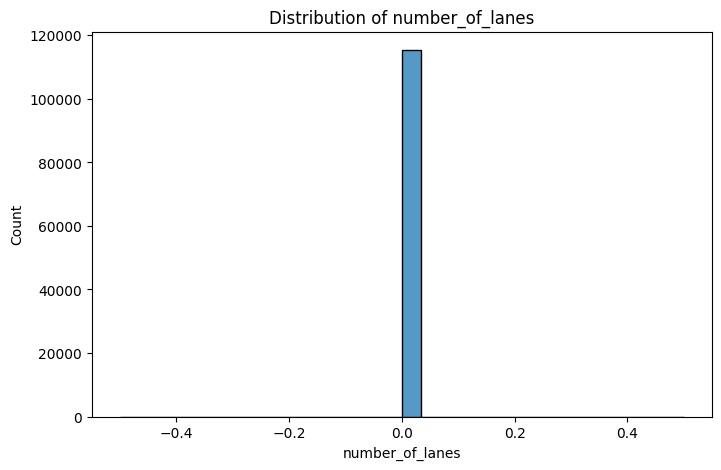

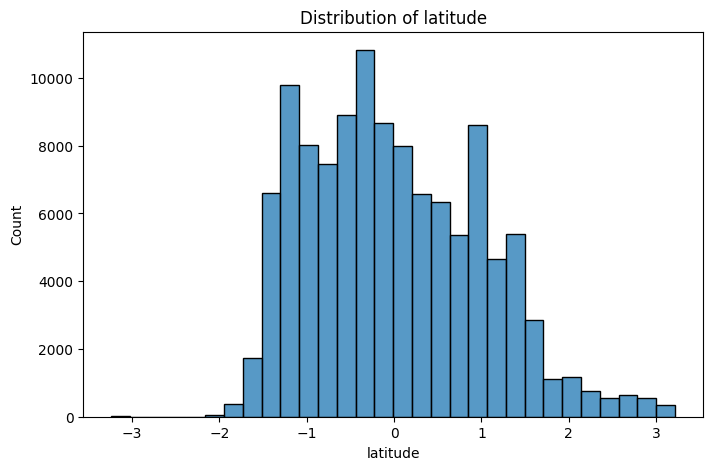

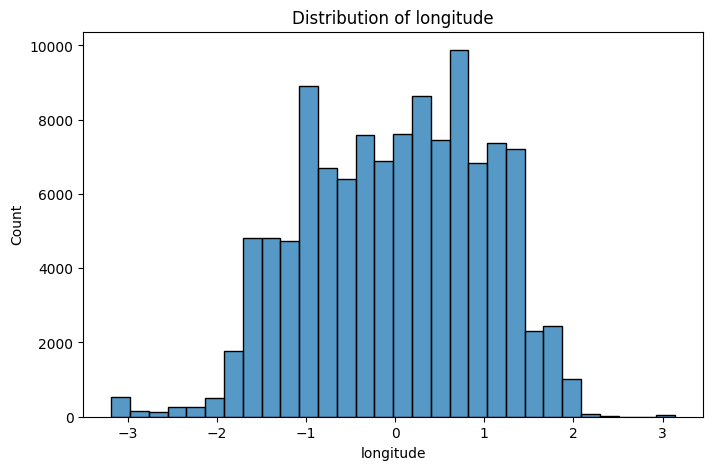

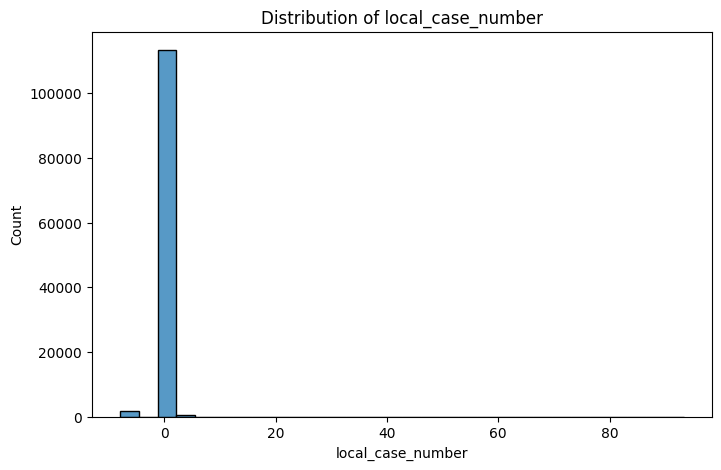

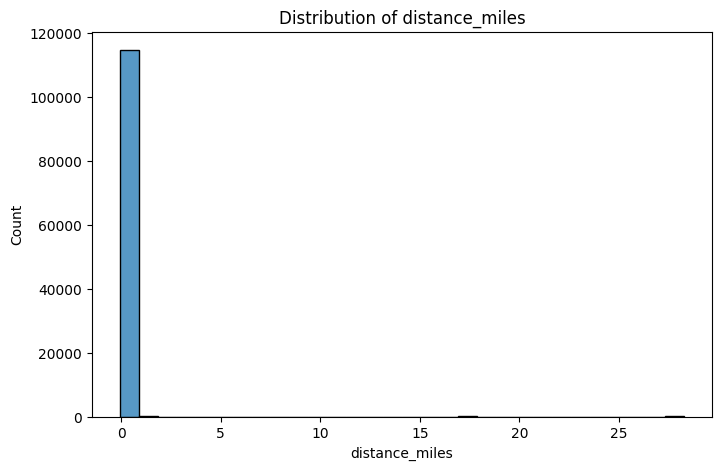

In [24]:
# Plot distribution for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_numerical_cols = df.select_dtypes(include=['number']).columns
for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=False, bins=30)  # Disable KDE for performance
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

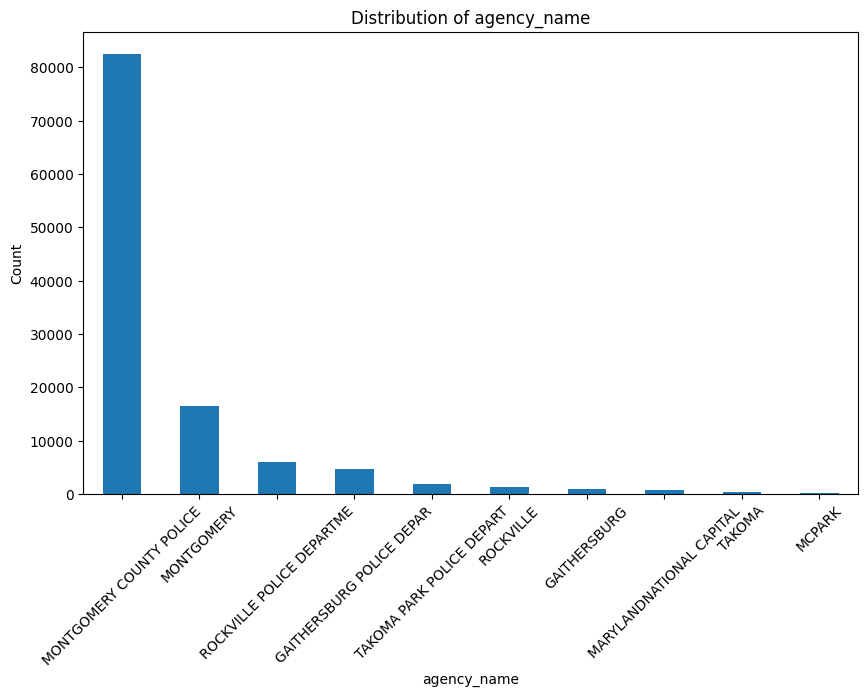

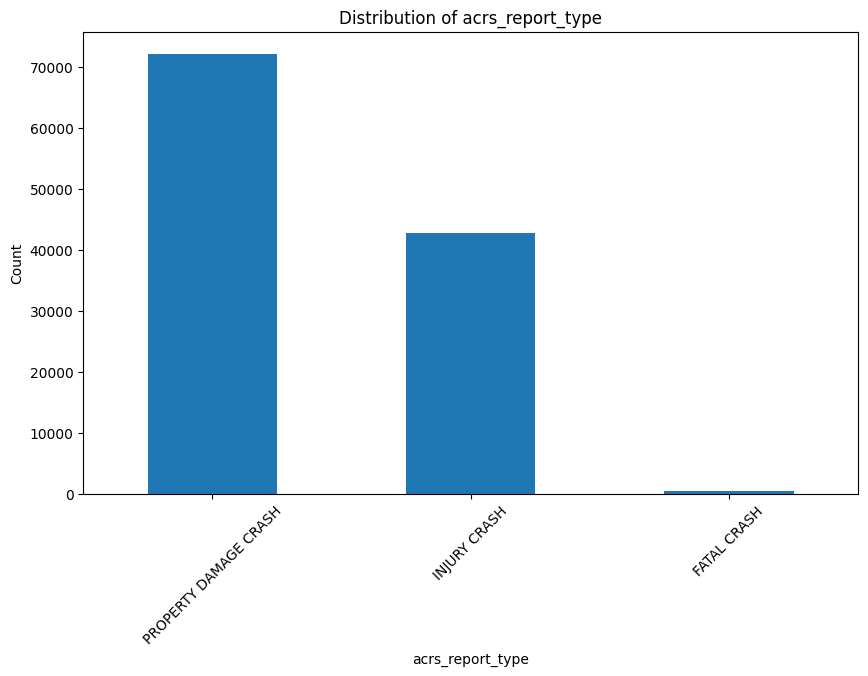

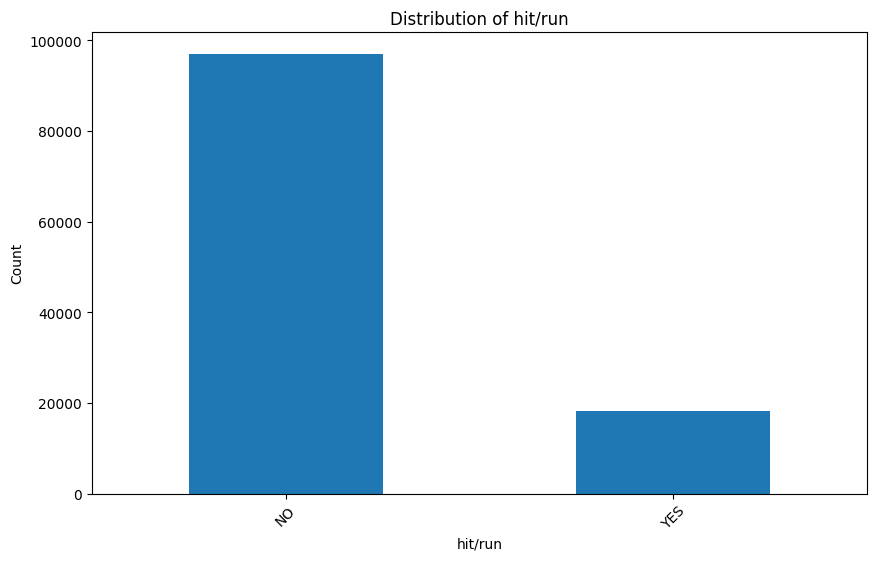

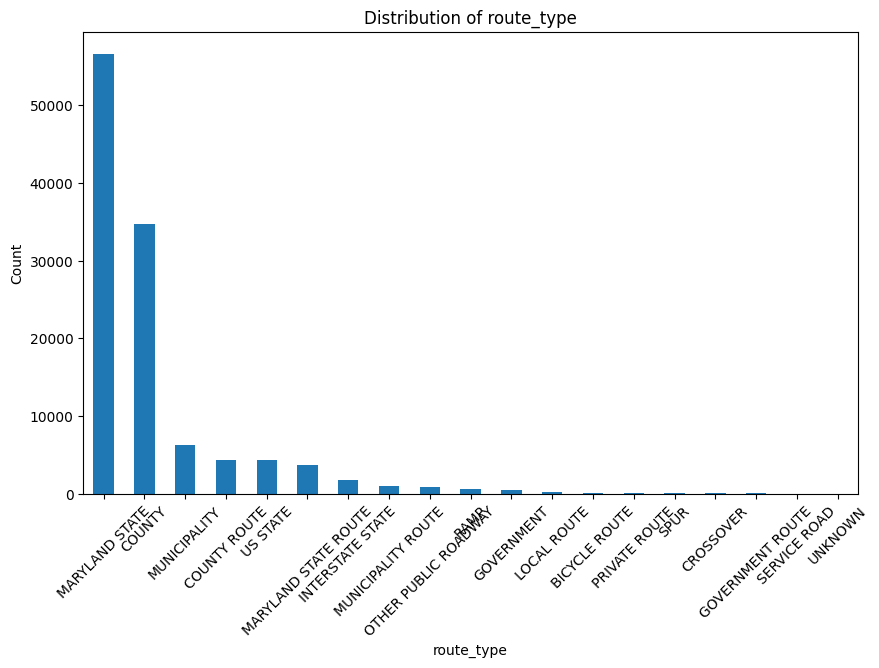

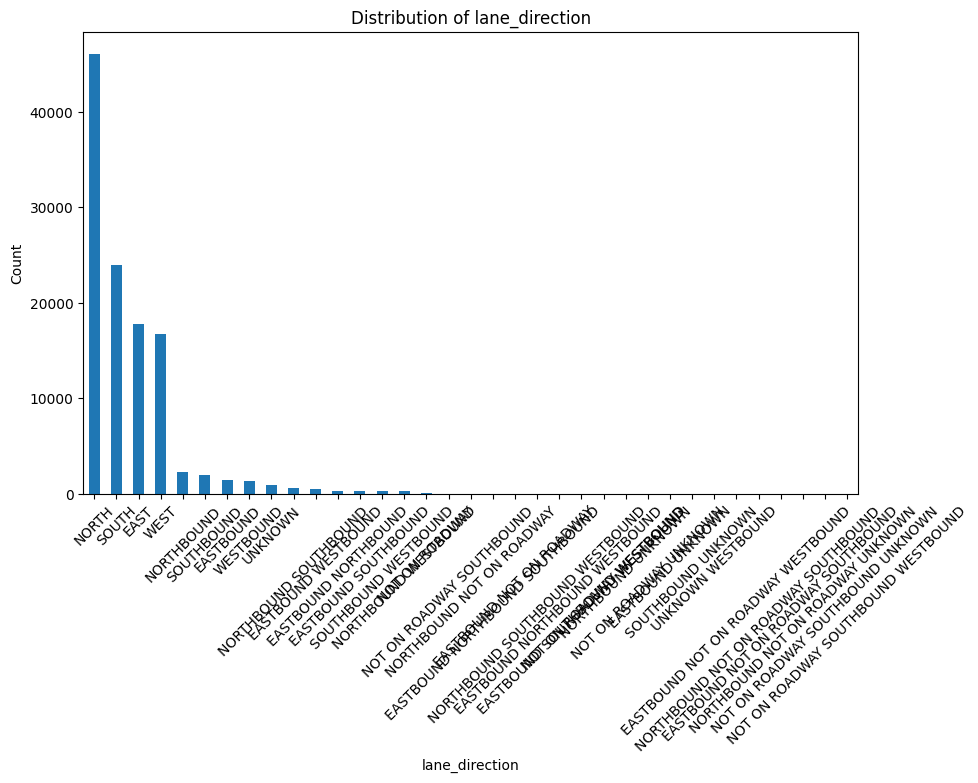

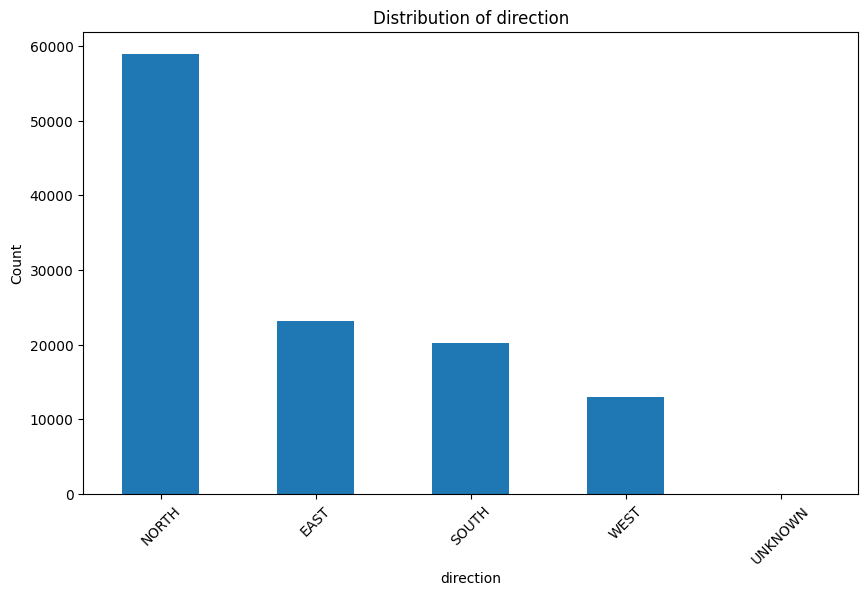

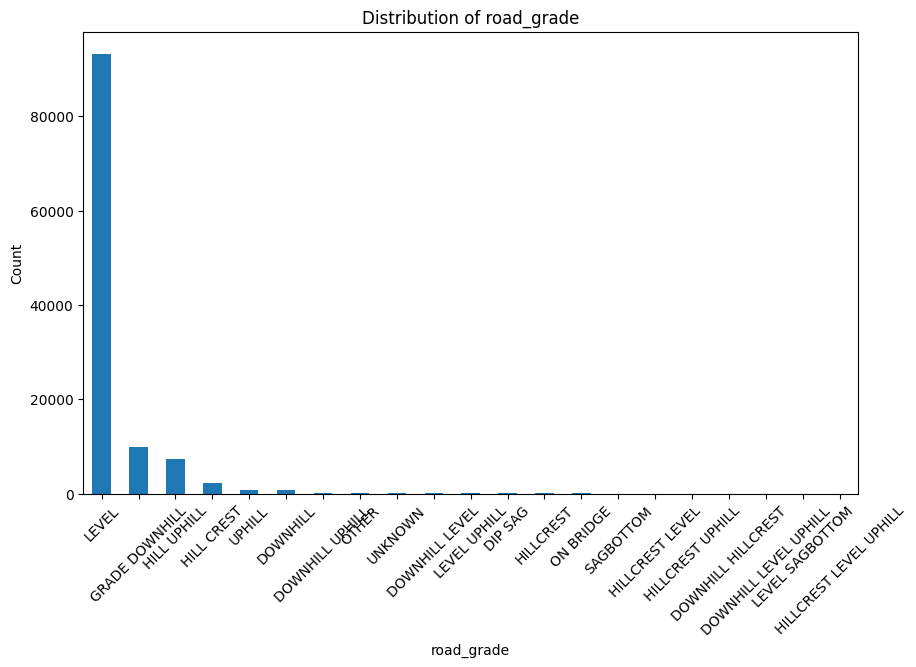

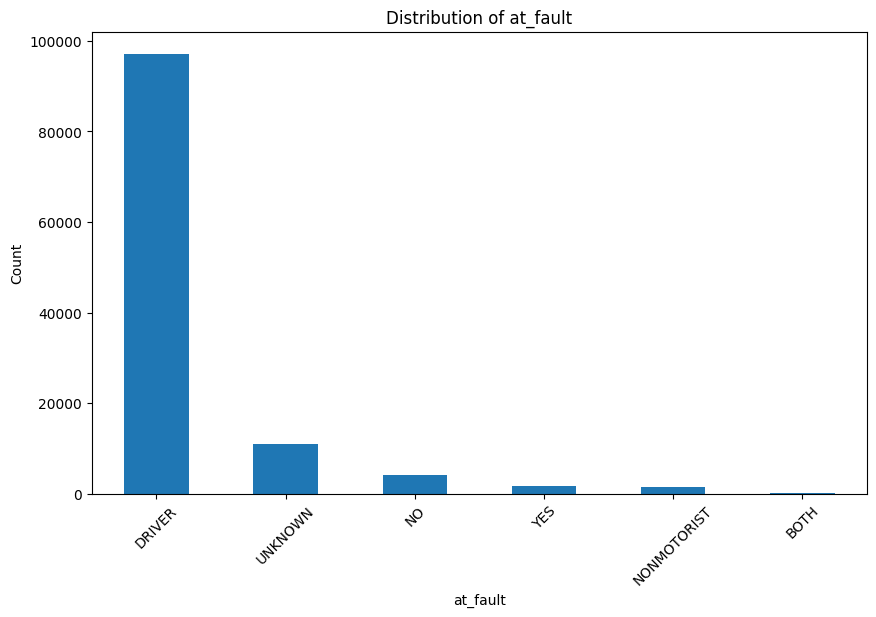

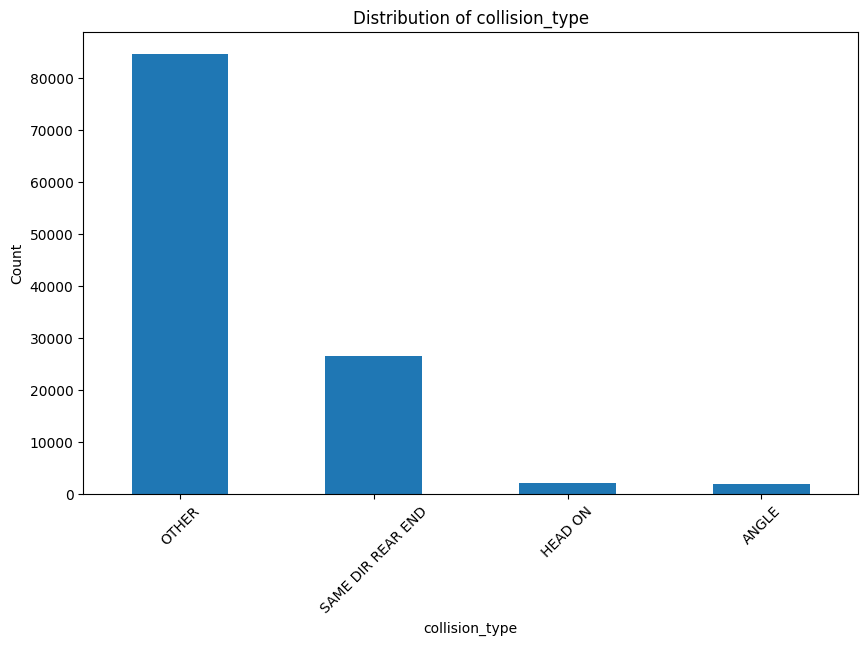

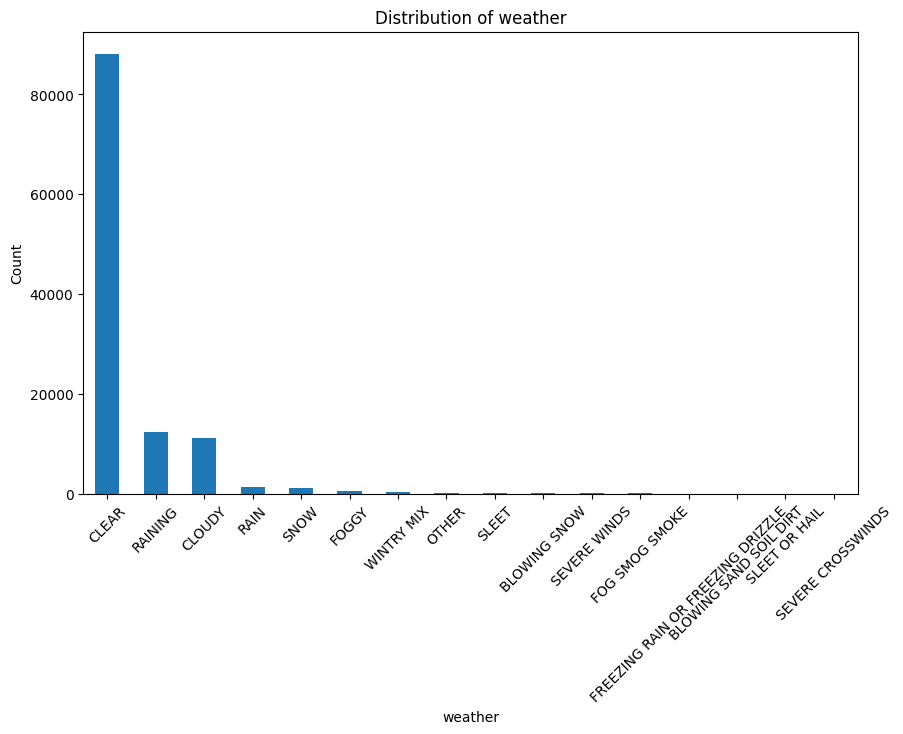

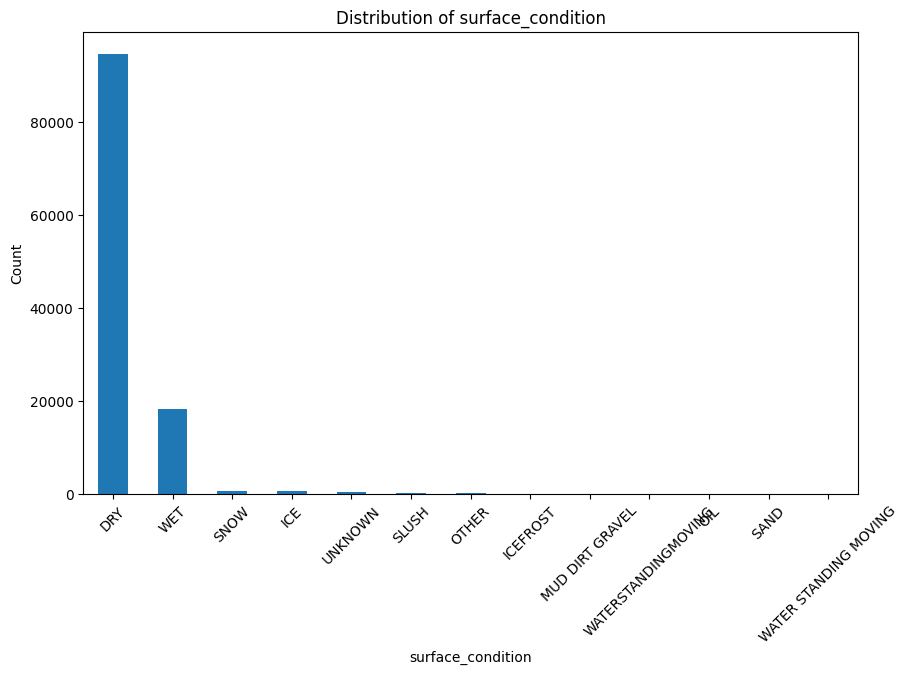

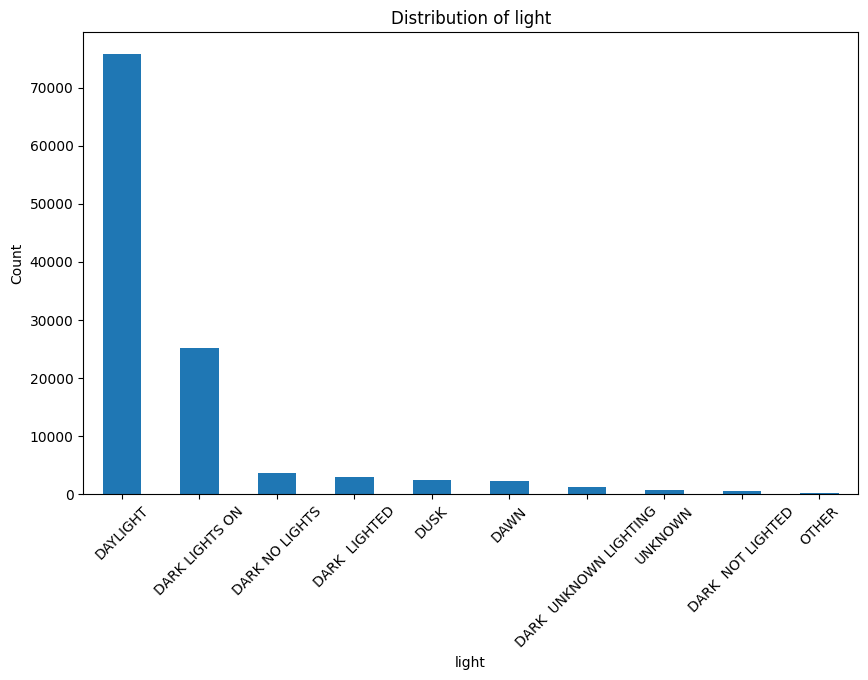

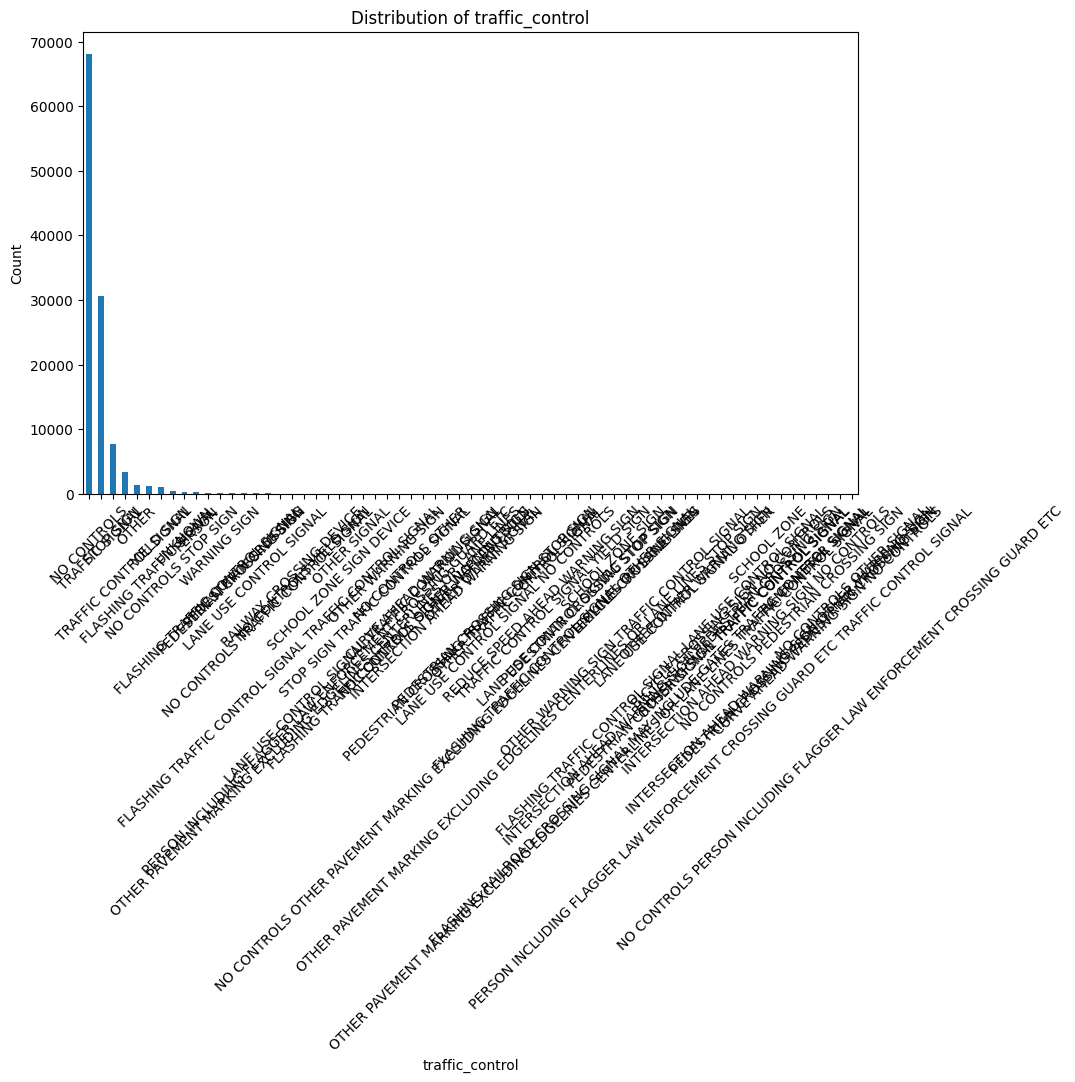

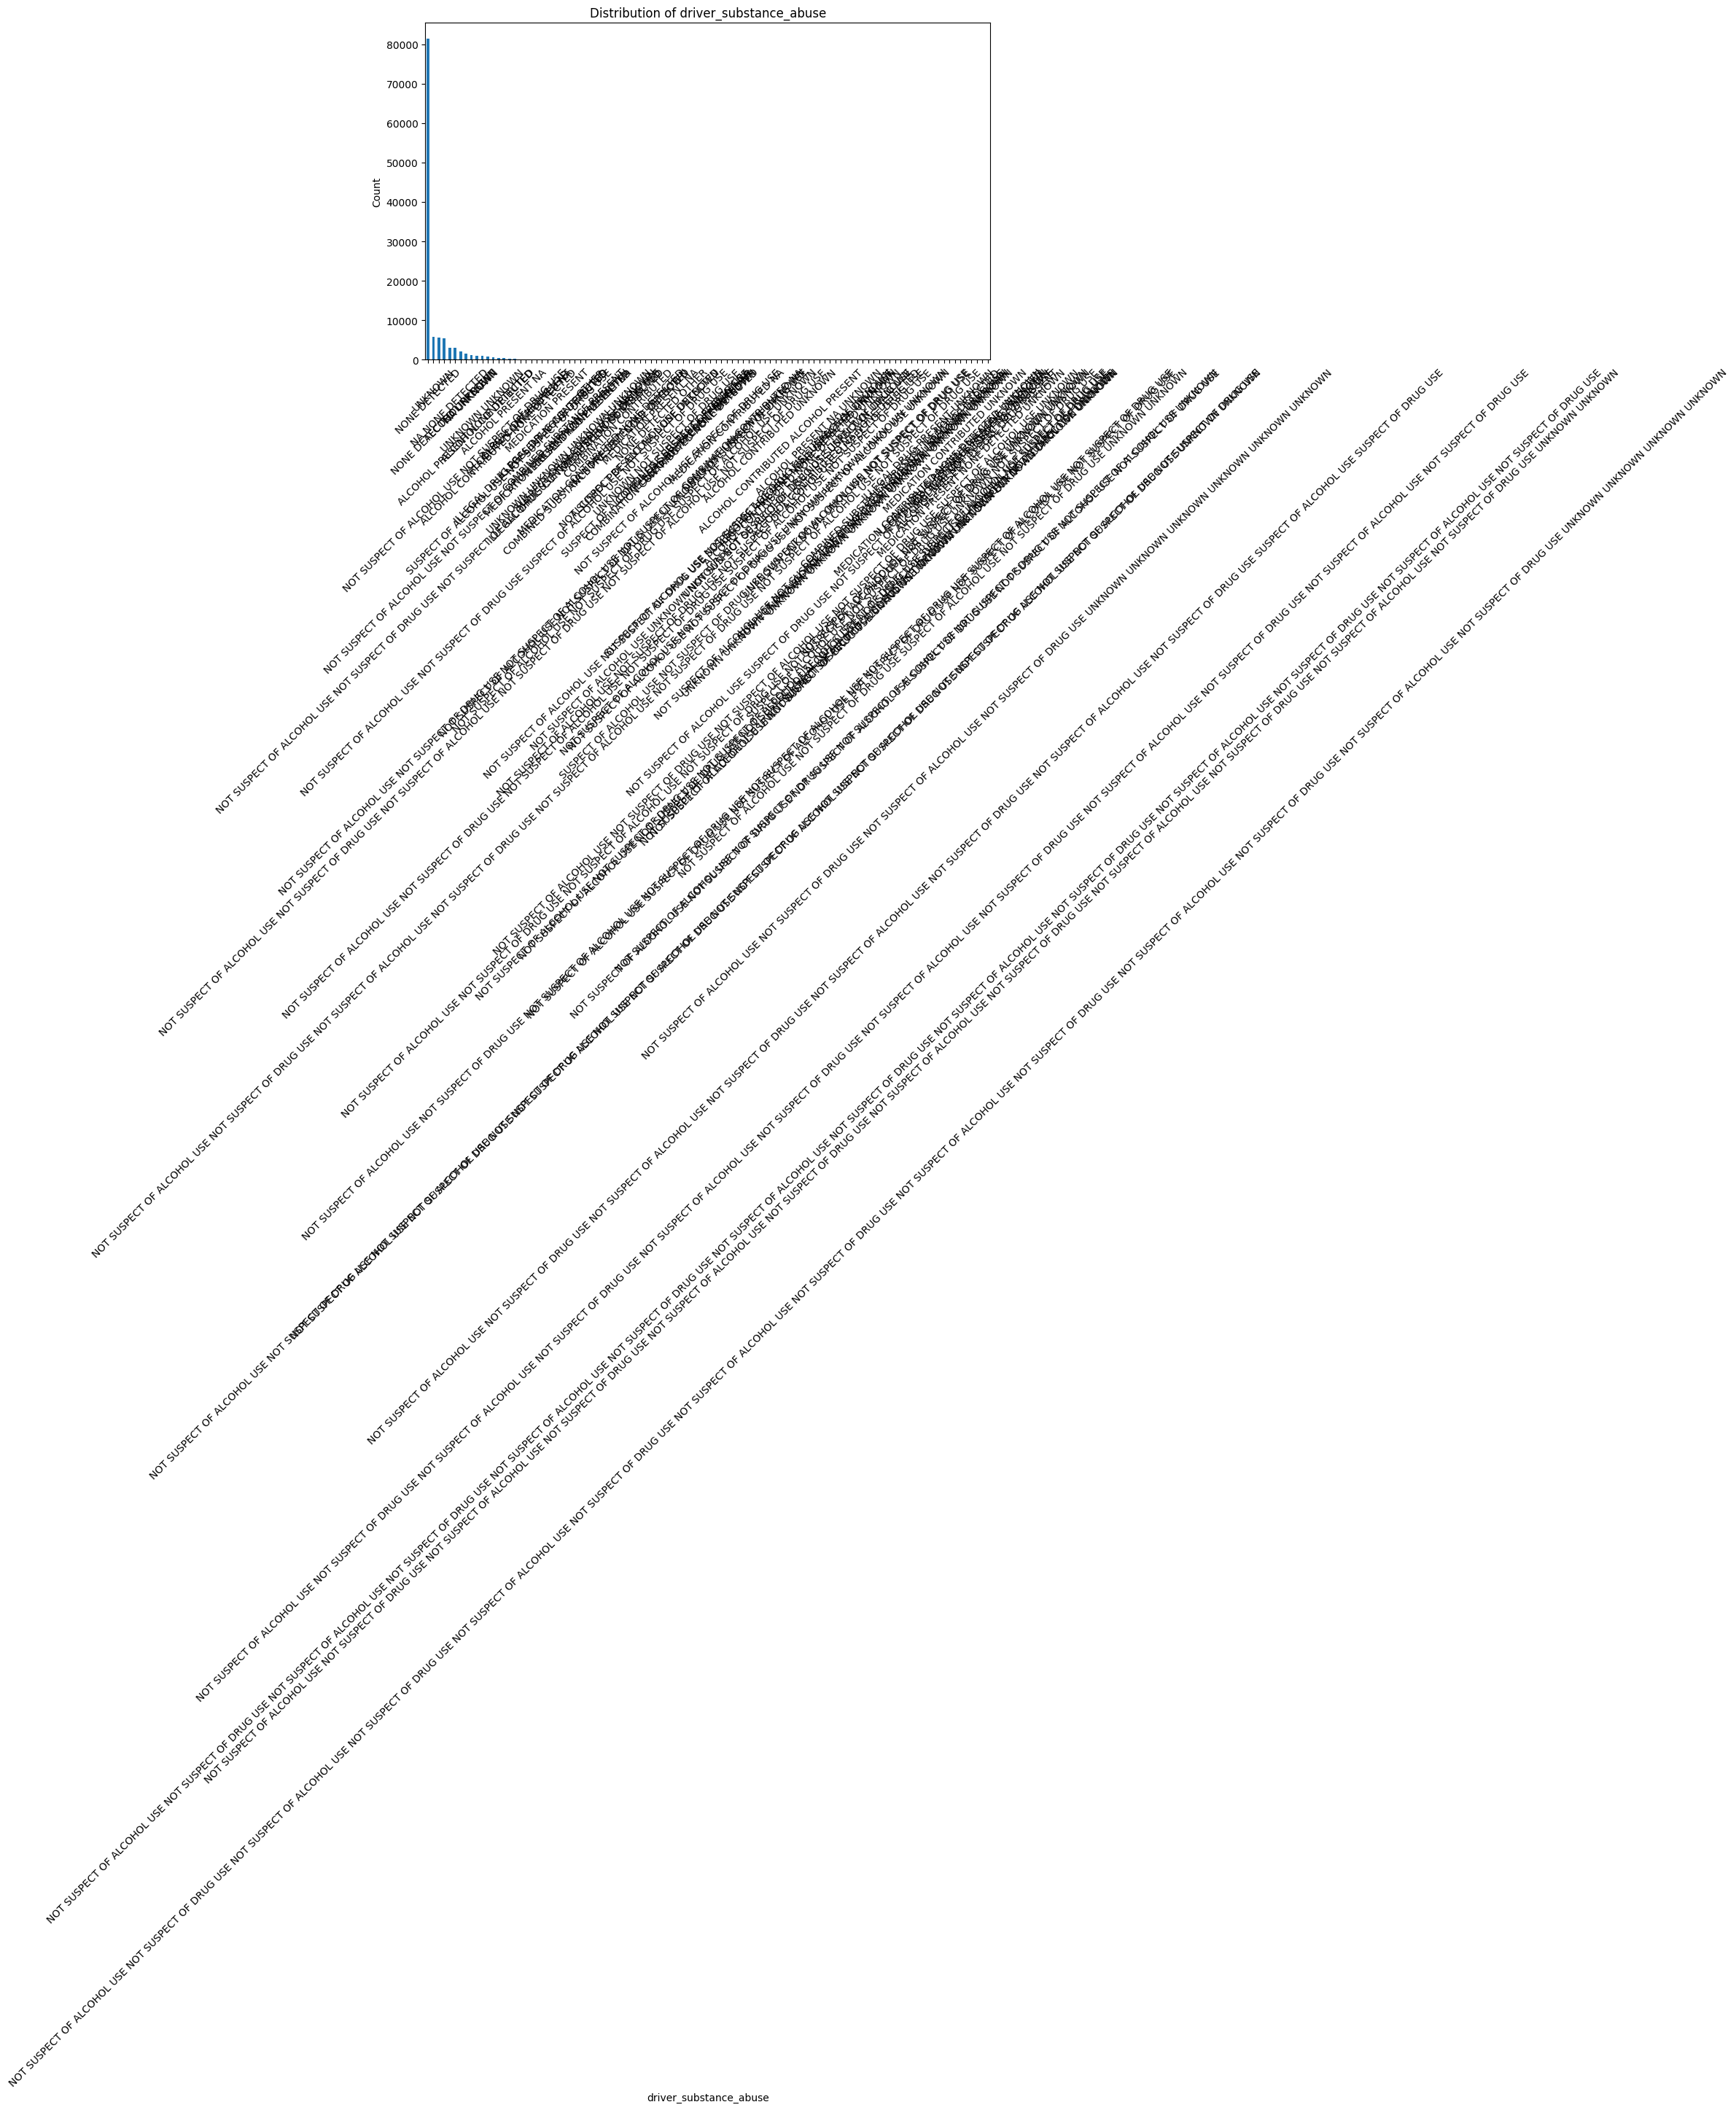

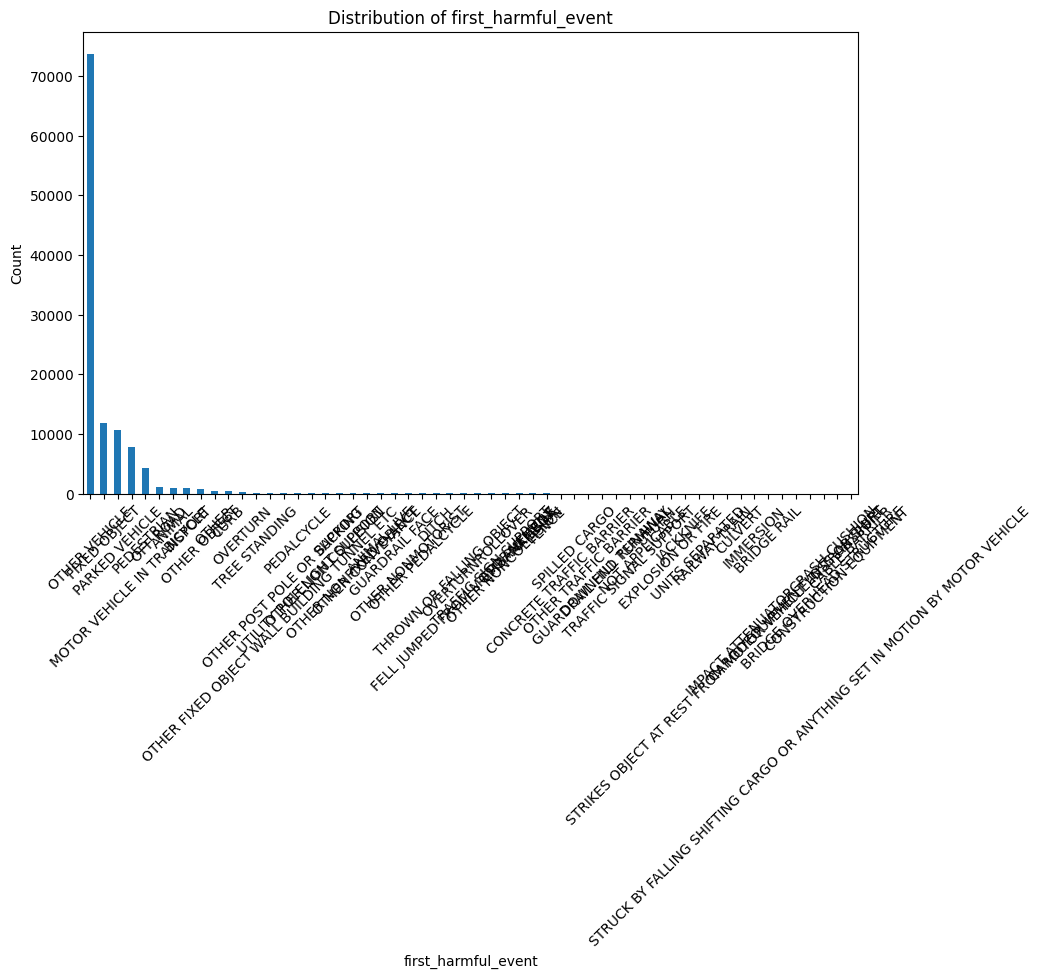

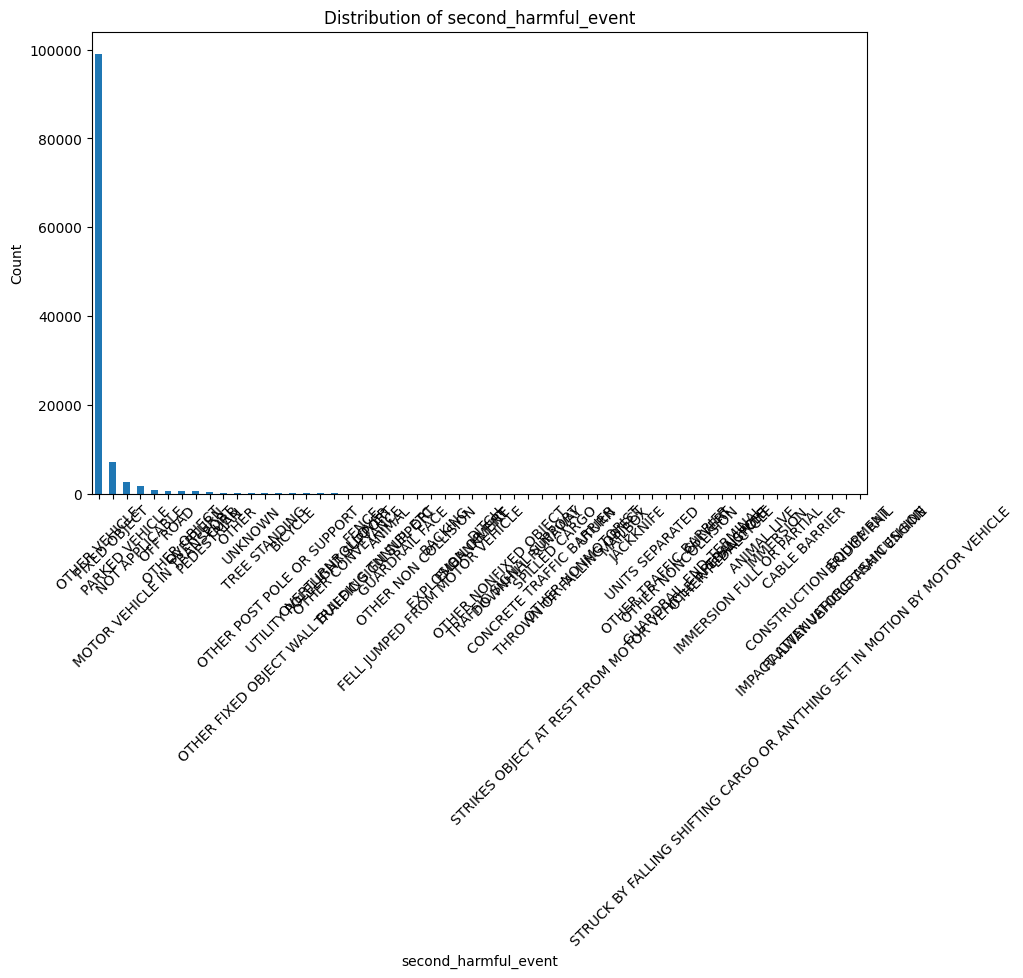

) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


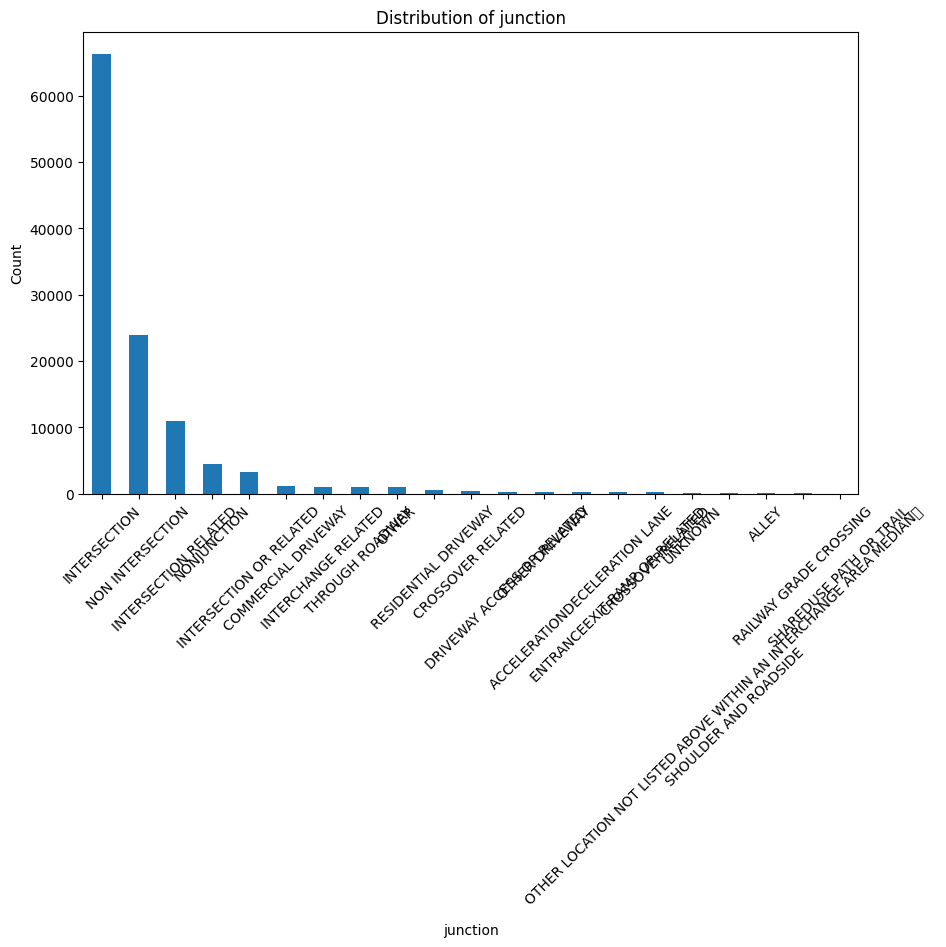

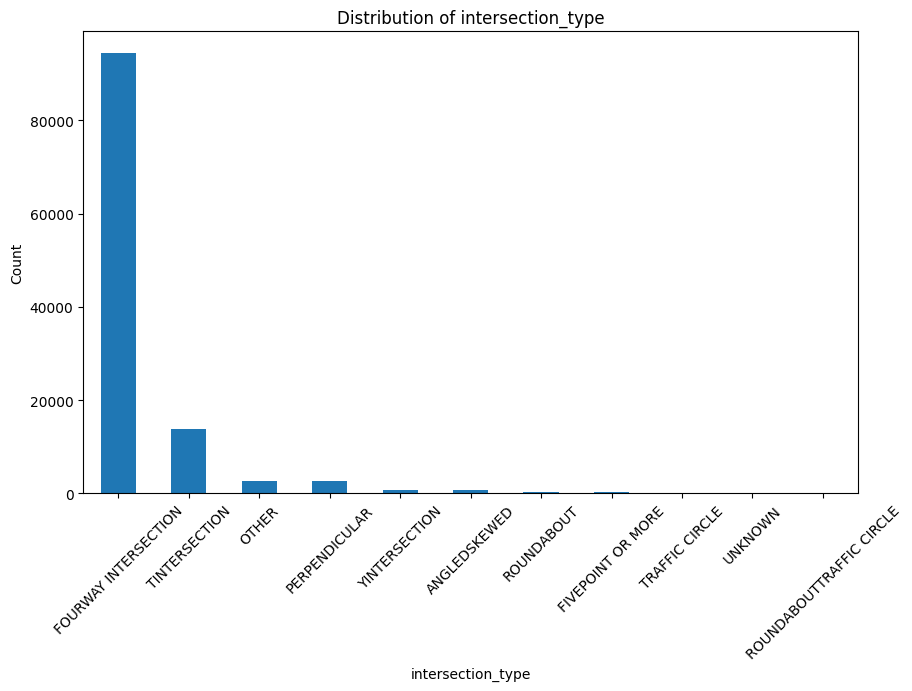

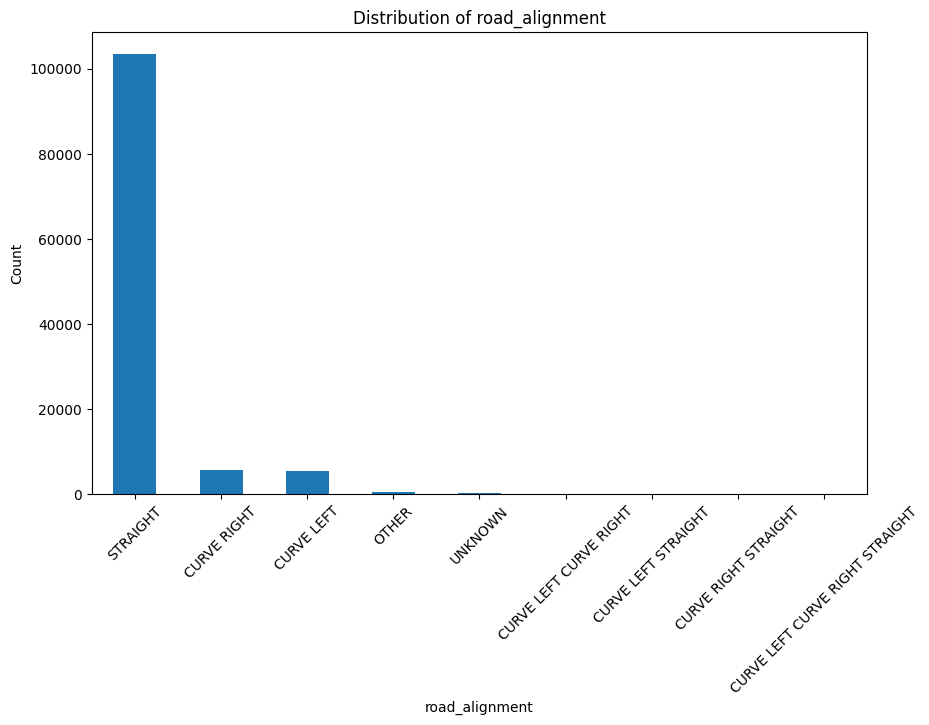

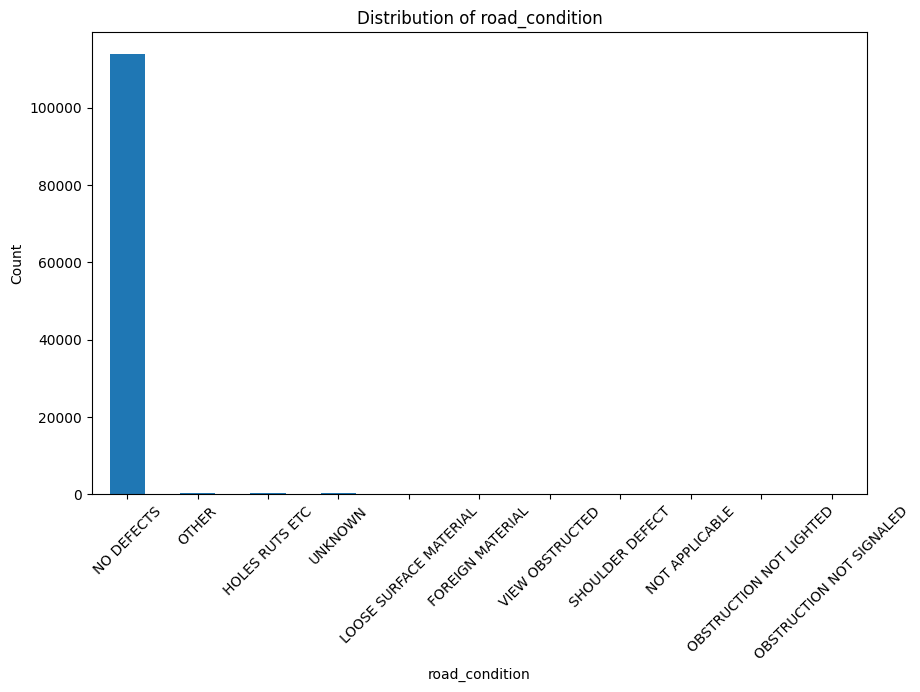

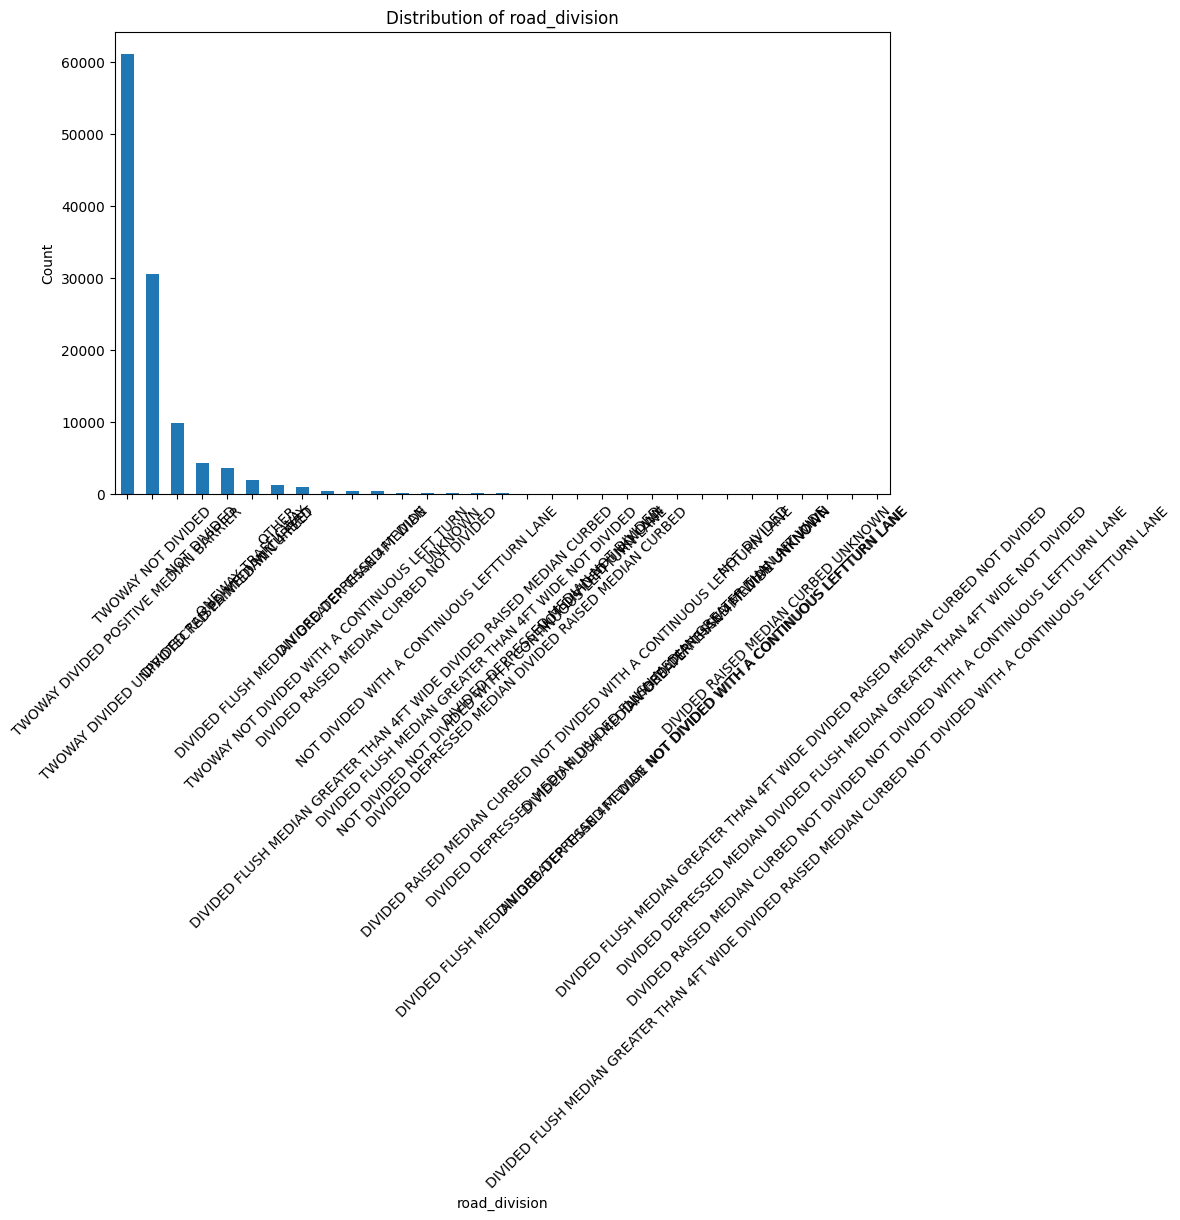

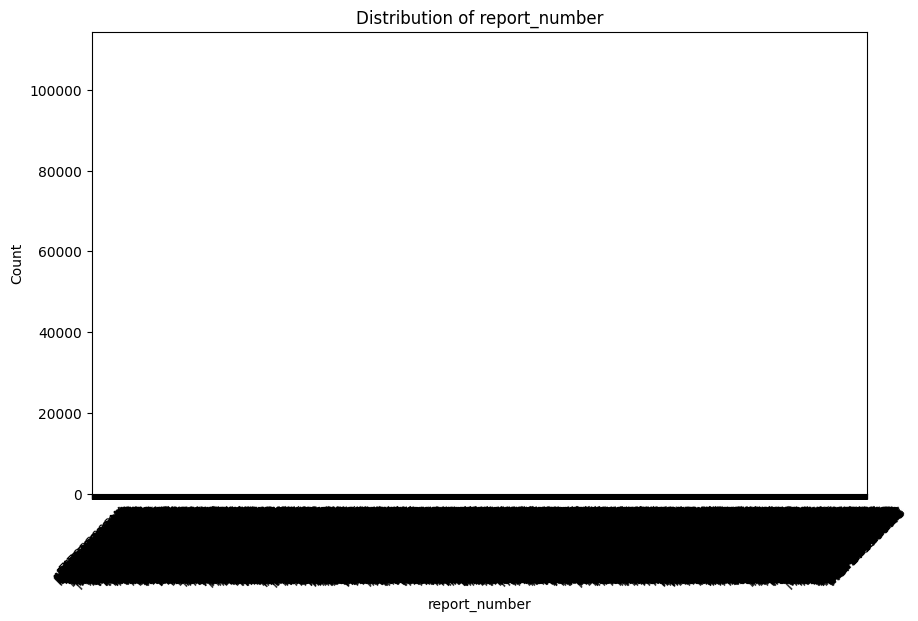

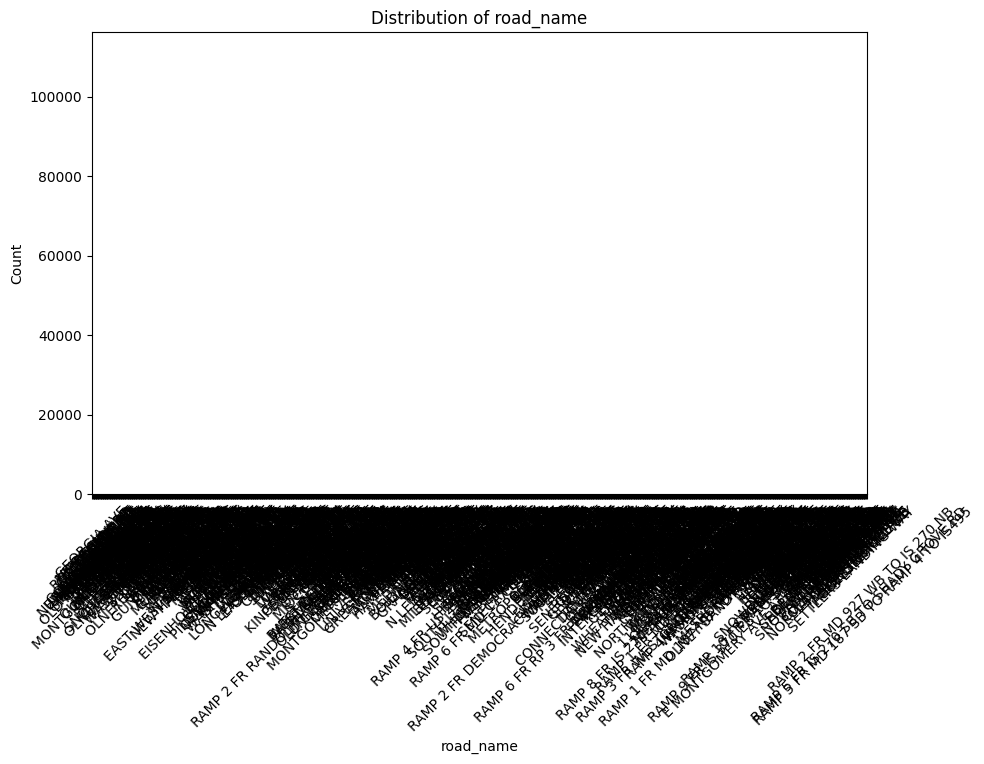

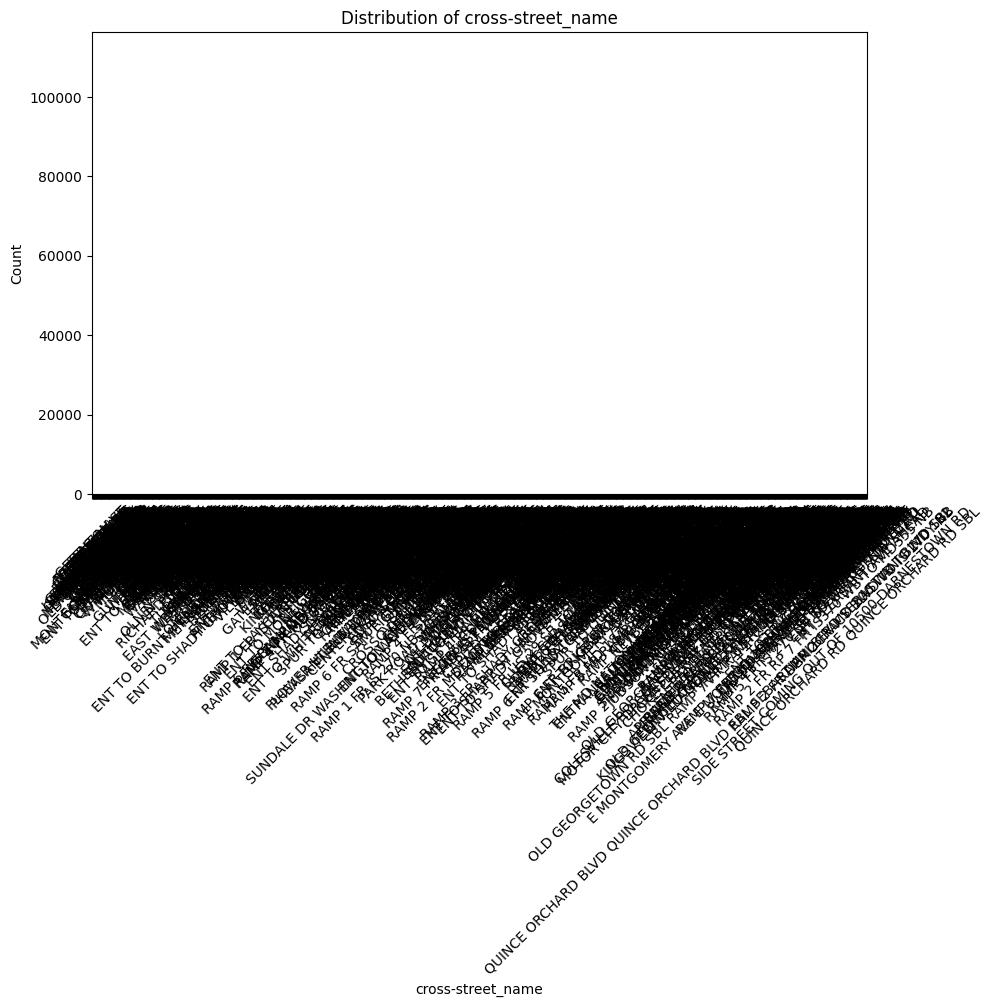

KeyboardInterrupt: 

In [40]:
# Plot bar charts for categorical columns
cleaned_categorical_cols = df.select_dtypes(include=['object']).columns
for col in cleaned_categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


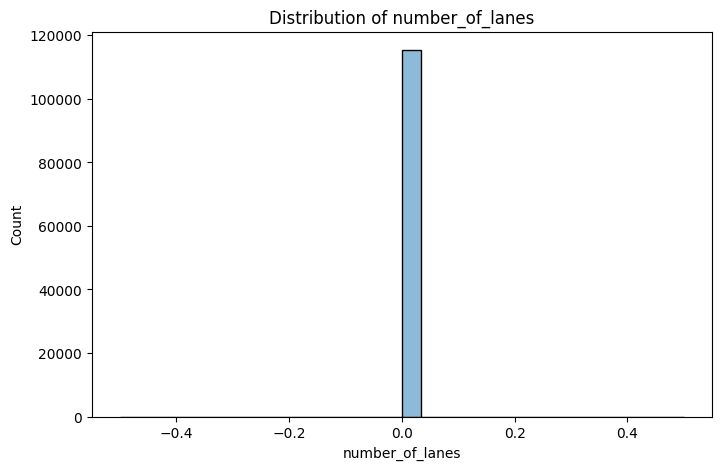

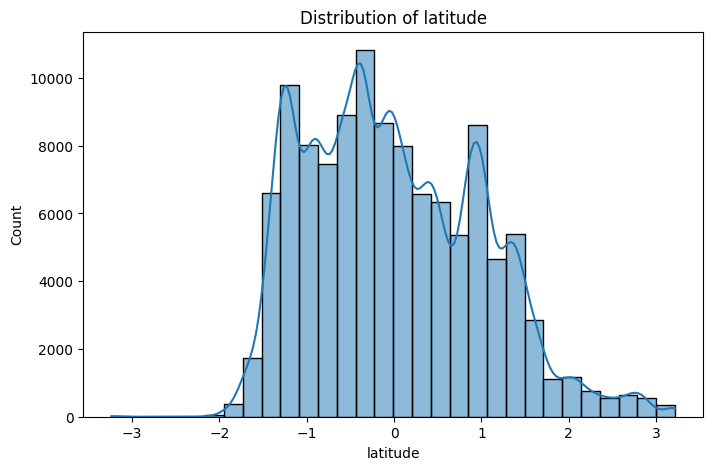

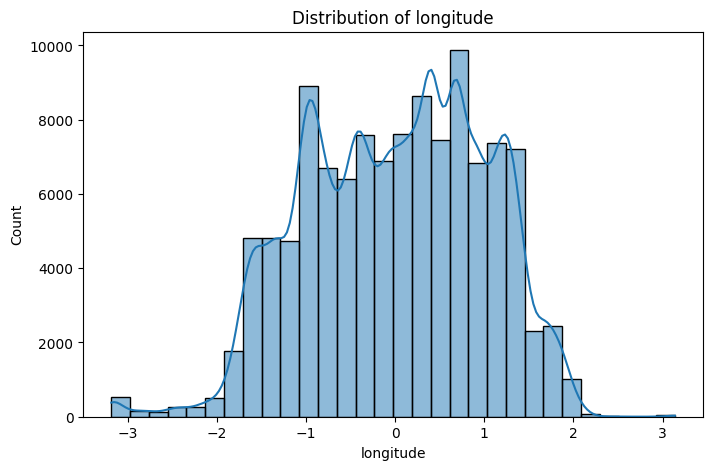

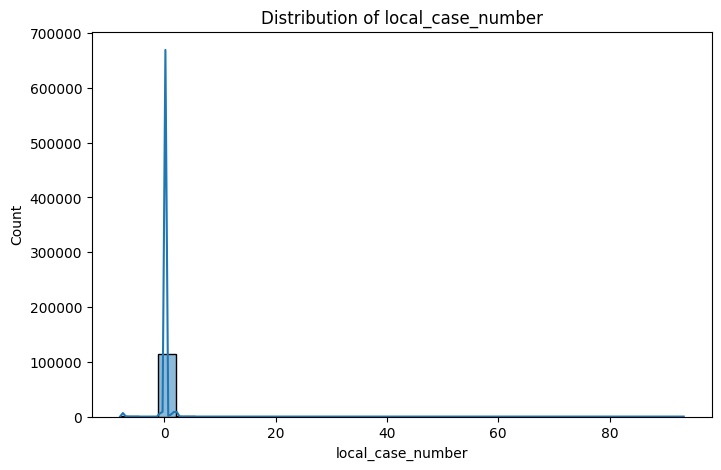

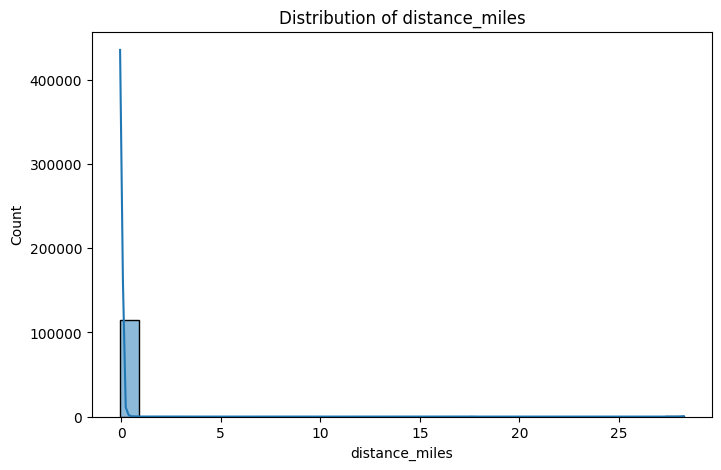

In [42]:
plt.ion()

for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [44]:
!pip install ace_tools

In [45]:
!pip install -U pip setuptools

In [73]:
# Append rows (Union of both datasets)
combined_data = pd.concat([incidents_data, non_motorists_data], ignore_index=True)

# Convert datetime columns to numeric (Unix timestamp)
for col in combined_data.select_dtypes(include=['datetime64']):
    combined_data[col] = combined_data[col].astype('int64') // 10**9

# Identify categorical columns
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col].astype(str))
    label_encoders[col] = le

# Ensure all columns are numeric
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Reduce memory usage by converting to float32
combined_data = combined_data.astype('float32')

# Save the combined dataset to a new file
combined_data.to_csv("/mnt/data/Combined_Crash_Reports_Encoded.csv", index=False)

print("Datasets successfully appended, label-encoded, and saved as 'Combined_Crash_Reports_Encoded.csv'")


NameError: name 'incidents_data' is not defined

In [65]:
import matplotlib.pyplot as plt

# Plotting F-values and p-values for all features
plt.figure(figsize=(14, 6))

# Sort features by F-value for better visualization
sorted_df = importance_df.sort_values(by='F-value', ascending=False)

# Plot F-values
plt.bar(sorted_df['Feature'], sorted_df['F-value'], color='skyblue', label='F-value')

# Overlay p-values as red dots
plt.scatter(sorted_df['Feature'], sorted_df['p-value'] * max(sorted_df['F-value']), color='red', label='p-value (scaled)', zorder=5)

plt.xlabel('Features')
plt.ylabel('Values (F-value & Scaled p-value)')
plt.title('Feature Importance based on F-value and p-value')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'importance_df' is not defined

<Figure size 1400x600 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [ ]:
cleaned_numerical_cols

In [ ]:
# Drop the 'number_of_lanes' column
df.drop('number_of_lanes', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the specified categorical columns
for col in cleaned_categorical_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

# Save the encoded dataset
df.to_csv("Encoded_Crash_Dataset.csv", index=False)


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()